In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os

sys.path.append('/home/user/deep-learning/')
sys.path.append('/home/gbaasch/projects/def-revins/gbaasch/deep-learning')
sys.path.append('../../methods')

In [3]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
from fastai.metrics import root_mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd

from BlackBoxMethod import ResNet, BasicBlock, RNNRegression
from BuildingDataset import BuildingDataset, DataBunch, get_dls

from training.exp.learner import Learner
from training.exp.runner import prep_run_vanilla, prep_one_cycle
# from datahandlers.exp.basic_databunch import DataBunch, get_dls

# Params for papermill

In [4]:
# this cell is tagged `parameters`
label_idx   = 5 
network     = 'cnn'
run_count   = 1
train_fname = '../../hdf5/train.hdf5'
valid_fname  = '../../hdf5/test.hdf5'

In [5]:
# Parameters
network = "cnn"
label_idx = 5
train_fname = "../../hdf5/train.hdf5"
valid_fname = "../../hdf5/test.hdf5"


In [6]:
save_name = str(label_idx) + '_' + network + '_' + str(run_count)

In [7]:
label_idx, network, run_count, save_name

(5, 'cnn', 1, '5_cnn_1')

# Prep Data

In [8]:
# train_fname, valid_fname = 'train.hdf5', 'test.hdf5'
batch_size = 100

train_ds = BuildingDataset(train_fname, label_idx)
valid_ds = BuildingDataset(valid_fname, label_idx)

len(train_ds), len(valid_ds)

data = DataBunch(*get_dls(train_ds, valid_ds, batch_size))
data.train_ds[0][0].shape

torch.Size([2000, 4])

# Train

In [9]:
use_gpu = True

def run_model(model, opt, db, lr=0.01, epochs=10):
    # prepare basic training
    loss = F.mse_loss
    metrics = [root_mean_squared_error]
    learner = Learner(model, opt, db, loss, use_gpu=use_gpu)
    # run training loop
    run = prep_run_vanilla(metrics, use_cuda=use_gpu)
    run.fit(epochs, learner)
    run.recorder.plot_loss()
    return learner

def run_model_one_cycle(model, opt, db, epochs=10):
    # prepare basic training
    loss = F.mse_loss
    metrics = [root_mean_squared_error]
    learner = Learner(model, opt, db, loss, use_gpu=use_gpu)
    # run training loop
    run = prep_one_cycle(use_cuda=use_gpu, metrics=metrics, min_lr=0.00001, max_lr=0.001)
    run.fit(epochs, learner)
    run.recorder.plot_loss()
    return learner

In [10]:
def resnet(ni, **kwargs):
    model = ResNet(ni, BasicBlock, [3, 4, 6, 3, 3], **kwargs)
    return model

In [11]:
if network == 'cnn':
    model = resnet(ni=4, num_classes=1)
    
elif network == 'rnn':
    model = RNNRegression(ni=4)
    
opt = torch.optim.Adam(model.parameters())

epoch      train loss          valid loss     root_mean_squared_error
0          11176.1332          10704.9638           96.1934       


1          10648.4797          10297.6134           94.4835       


2          10380.7849          10182.1342            93.91        


3          10220.7665          9959.1704             92.915       


4          10084.9867          10020.6419           93.0987       


5           9937.736           9683.3241             91.642       


6          9759.9448           9523.8595             90.915       


7          9516.8547            9450.621            90.5588       


8          9209.6967           8764.8338            87.5948       


9          8828.2652           8536.5876            86.5279       


10         8333.2849           7932.4958            83.7992       


11         7723.9442            7138.904            79.9233       


12          6995.842           7290.5953            80.4965       


13         6162.0501           5272.9844            69.9393       


14         5244.2329           4554.6419            65.4437       


15         4275.1783           3981.1711             61.478       


16         3315.6659           3049.0327             54.436       


17         2435.6677           1931.5657            43.7342       


18         1649.7522           1395.6769            37.2959       


19          999.2447            744.6912            27.1626       


20          542.4868            343.6095            17.8382       


21          230.9951            565.1725            23.4293       


22          65.1543             20.0216              4.2153       


23          27.7382             26.9918              5.171        


24          14.4437             29.4855              4.822        


25          11.6621             37.5211              5.3983       


26           9.681               7.0005              2.5966       


27           8.6407             25.8541              4.9791       


28           4.8619              0.8282              0.9007       


29           3.7401              6.6508              2.5522       


30           4.3841              2.9821              1.6574       


31           2.9197             14.5867              3.7761       


32          12.8067             11.9298              3.2988       


33           4.3217             44.3434              6.6331       


34           4.381               7.6251              2.5361       


35           3.1831             17.3401              4.1342       


36           3.1098              2.7657              1.3922       


37           3.8926              4.1898              1.9124       


38           2.6347             494.8108            19.6598       


39          19.0244               96.0               9.7783       


40           9.5737             10.4282              2.9391       


41           2.3653              1.5247              1.2115       


42            3.31               1.5271              1.2061       


43           2.3697             89.3323              8.0635       


44           9.5774              4.3361              1.8781       


45           3.1775              0.8822              0.9283       


46           2.3779             70.1289              8.2933       


47           4.6177              0.9486              0.9646       


48           2.1281              4.0193              2.0001       


49           2.3621              3.021               1.7112       


50           2.1343              0.6208              0.7796       


51           2.2504             133.6176            10.8205       


52           2.6958              0.929               0.9508       


53           1.9867              21.093              4.3397       


54           1.9302              2.7565              1.5414       


55           1.7457              5.2126              2.0957       


56           1.7452              7.8038              2.7524       


57           1.5056              0.5348              0.7236       


58           1.9392              6.9673              2.2046       


59           1.5092              1.6029              1.2548       


60           1.5151              4.0467               1.93        


61           1.7564             15.4527              3.4901       


62           2.1473             31.7926              4.7011       


63           2.0847              2.0577              1.4266       


64           1.7746             19.8811              4.4435       


65           1.9603             13.2555              3.3423       


66           1.6318             62.5768              7.4719       


67           2.4497             988.0539            31.0014       


68          15.9593             363.5405            18.5727       


69          24.1709              6.6318              2.3909       


70           7.0323             25.4617              4.4857       


71           3.4936              2.5205              1.5451       


72           2.6727              1.4807              1.1727       


73           2.3663              8.5461              2.7062       


74           2.1554              5.4864              2.056        


75           1.6018              1.2953              1.1174       


76           3.4158              4.2598              2.0228       


77           2.0844              2.5207              1.4652       


78           2.2818             223.9131            13.9451       


79           6.6754              5.6003              2.2148       


80           2.6424             17.9268              4.111        


81           2.3888             33.3006              4.9389       


82           1.7495              2.4178              1.4683       


83           2.0169              1.819               1.2394       


84           1.6804              5.3367              2.2053       


85           1.4509              1.8321              1.3269       


86           1.3991              1.2885              1.1218       


87           1.9156              3.5857              1.8283       


88           1.6364               3.04               1.6238       


89           5.3556             85.3333              7.4877       


90           4.7812              2.9102              1.571        


91           1.8056              0.7575              0.8614       


92           1.5846              2.5247              1.4364       


93           2.4355             705.3662            23.0333       


94          20.7982              2.6959              1.5646       


95           2.4906             23.1498              4.7992       


96           3.004               8.5946              2.6283       


97           2.2732              1.7166              1.2801       


98           2.7195              1.9076              1.3502       


99           2.5215              3.6559              1.7903       


100          1.6878              1.067               0.9951       


101          1.609               3.1866              1.6954       


102          2.2341             289.9915            16.0647       


103         10.3142              4.2104              2.0202       


104          2.5849              2.2511              1.4504       


105          2.0904              2.3242              1.5029       


106          1.8394              2.7469              1.6422       


107          1.7374              0.6623              0.8066       


108          1.688               1.4642              1.1931       


109          1.8617              1.9627              1.3874       


110          1.6217              0.5701              0.7388       


111          1.884               0.9222              0.9407       


112          1.2964              0.7667              0.8562       


113          1.3698              1.7126              1.205        


114          1.3861              8.3129              2.4689       


115          1.7343             16.4822              3.4442       


116          1.2388              3.2396              1.6572       


117          1.5185              1.6782              1.2723       


118          1.3709             11.9041              3.0499       


119          1.4137               5.27               2.0867       


120          1.5825              0.6794              0.8152       


121          1.5494              3.1322              1.6965       


122          1.3992              1.5979              1.2032       


123          1.1206              1.4131              1.144        


124          1.1903              2.0274              1.2606       


125          1.4496              3.5271              1.8007       


126          1.3718              1.716               1.2569       


127          1.3375              7.9067              2.7064       


128          1.5809             133.2686            10.8041       


129          4.8079             75.6477              8.2584       


130          2.7717              0.8677              0.9024       


131          1.3574              0.9465              0.9361       


132          1.4744              1.5071              1.1862       


133          1.0613              1.7731              1.2338       


134          1.2478              1.2121              1.0921       


135          1.1504              2.5533              1.5829       


136          1.2634              8.4992              2.8792       


137          1.2381              0.8497              0.9069       


138          1.2825              2.0514              1.2935       


139          1.0725              3.4783              1.8391       


140          1.1107             10.7014              3.1921       


141          1.0746              7.1661              2.6295       


142          1.1284              1.2433              1.0277       


143          1.1767              0.9453              0.9657       


144          1.1075              0.9648              0.954        


145          1.0775              1.5283              1.2261       


146          1.0162              0.5143              0.7004       


147          1.032               1.3937              1.1201       


148          1.0016              6.027               2.4396       


149          1.0656              1.9794              1.3697       


150          1.1269              2.9672              1.6776       


151          1.0279              6.0887              2.4618       


152          1.0848              5.4141              2.2304       


153          0.9895              1.0673              0.998        


154          1.045               1.1394              1.0577       


155          0.9708              6.466               2.1864       


156          1.0442              2.5344              1.5201       


157          1.0861              1.4104              1.1561       


158          0.9577              2.0536              1.3181       


159          0.981               1.3397              1.1419       


160          0.9223              2.0359              1.3671       


161          0.9235              2.1041              1.4419       


162          0.9531              2.6354              1.4553       


163          0.9037              0.7003              0.8284       


164          0.8194              2.1519              1.3374       


165          0.9649             50.9698              5.9897       


166          1.3647              1.5178               1.22        


167          0.9551              1.2829              1.0908       


168          0.9132              1.6816              1.2891       


169          0.938               1.0529              0.9722       


170          0.8574              0.8318              0.8912       


171          0.8559              0.4418              0.6617       


172          0.9409              0.5825              0.7553       


173          0.9039              0.8134              0.8844       


174          0.8403              1.3271              1.1476       


175          0.8628              0.4262              0.6465       


176          0.9411              0.9689              0.9738       


177          0.8212              0.6769              0.8129       


178          0.7535              1.6825              1.2882       


179          0.7164              0.9446              0.9684       


180          0.8107              0.9931              0.9839       


181          0.8195              2.3912              1.5293       


182          0.818               0.3988              0.6249       


183          0.7929              0.7953              0.8778       


184          0.7925              0.8597              0.9093       


185          0.8183              1.045               1.0153       


186          0.7928              2.5681              1.5833       


187          0.7865              2.3292              1.5164       


188          0.8227              2.7941              1.655        


189          0.7628              1.7024              1.2996       


190          0.722               5.1753              2.264        


191          0.8494              6.7221              2.5848       


192          0.7223              0.5284              0.7108       


193          0.7578              2.2396              1.4904       


194          1.2817             19.9018              4.3923       


195          0.8883              0.6077              0.7779       


196          0.7175              0.8478              0.9129       


197          0.7135              0.9078              0.937        


198          0.7598              0.5123              0.712        


199          0.7781              0.717                0.83        


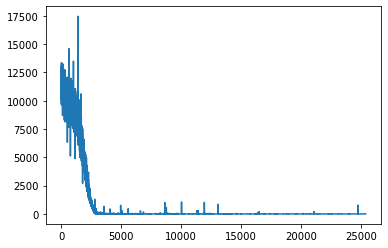

In [12]:
learner = run_model_one_cycle(model, opt, data, epochs=200)

# Predict

In [13]:
# mpath = f'models/cnn_inf' 
mpath = os.path.join('models', save_name)

In [14]:
torch.save(model.state_dict(), mpath) 

In [15]:
state = torch.load(mpath)
if network == 'cnn':
    m = resnet(ni=4, num_classes=1)
    
elif network == 'rnn':
    m = RNNRegression(ni=4)

ml = m.cuda()
ml.load_state_dict(state)
ml.eval();

In [16]:
del model
torch.cuda.empty_cache()

In [17]:
valid_preds = ml(data.valid_dl.x.cuda()) 

### Predict Train

In [18]:
# plt.scatter(data.train_dl.y, train_preds.tolist());
# plt.plot(data.train_dl.y, data.train_dl.y);
# plt.grid()

### Predict Valid

In [19]:
plt.scatter(data.valid_dl.y, valid_preds.tolist());
plt.plot(data.valid_dl.y, data.valid_dl.y);
plt.grid()

# Predict each case

In [20]:
cases_no_infiltration = [
    ('victoria', 'control_concrete', 'False'),
    ('victoria', 'control_concrete', 'True'),
    ('victoria', 'control_wood', 'False'),
    ('victoria', 'control_wood', 'True'),
    ('chicago', 'control_concrete', 'False'),
    ('chicago', 'control_concrete', 'True'),
    ('chicago', 'control_wood', 'False'),
    ('chicago', 'control_wood', 'True'),
    ('victoria', 'control_concrete_inf', 'False'),
    ('victoria', 'control_concrete_inf', 'True'),
    ('victoria', 'control_wood_inf', 'False'),
    ('victoria', 'control_wood_inf', 'True'),
    ('chicago', 'control_concrete_inf', 'False'),
    ('chicago', 'control_concrete_inf', 'True'),
    ('chicago', 'control_wood_inf', 'False'),
    ('chicago', 'control_wood_inf', 'True')
]

In [21]:
def case_string(case):
    case_name = ''
    for c in case:
        case_name += c #+ '\n'
    return case_name

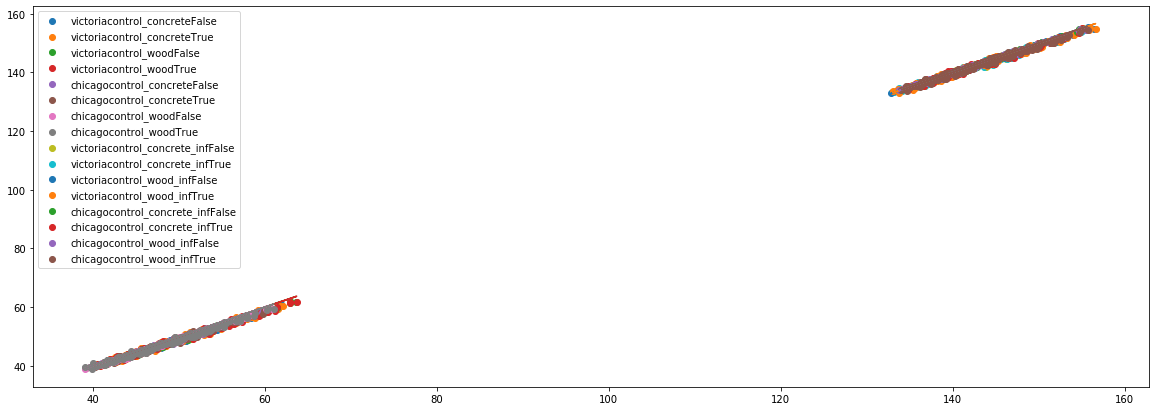

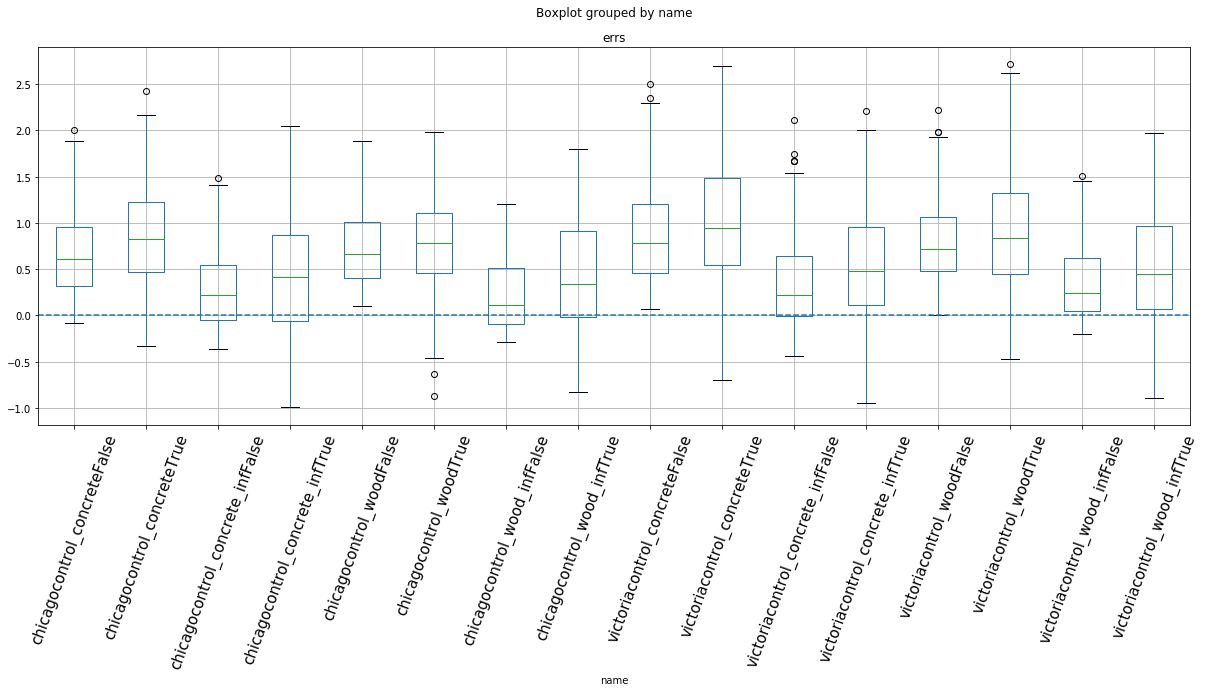

In [22]:
df_errs_all = pd.DataFrame()

plt.figure(figsize=(20,7))

for case in cases_no_infiltration:
    x, y = data.valid_dl.get_by_metadata(list(case))
    preds = ml(x.cuda()) 
    case_name = case_string(case)
    plt.scatter(y, preds.tolist(), label=case_name);
    plt.plot(y, y);
    plt.grid()
#     plt.show()
    df_errors = pd.DataFrame()
    df_errors['errs'] = y.sub(preds.to("cpu")).tolist()
    df_errors['name'] = case_name
    df_errs_all = df_errs_all.append(df_errors)
plt.legend()
plt.show()  

df_errs_all.boxplot(column='errs', by='name', figsize=(20, 7))
plt.axhline(0, 0, 1, label='No Error', linestyle='--')
plt.xticks(rotation=70, fontsize=15);